# Hoja de Trabajo 1

Javier Heredia - 21600 <br>
Mario Cristales - 21631

## Ejercicios

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import statsmodels.api as sm
import scipy.stats as stats

# Cargamos los datos en un DataFrame de pandas
df = pd.read_csv('movies.csv')

#### Pre-procesamiento de Datos

In [ ]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["castWomenAmount"] = pd.to_numeric(df["castWomenAmount"], errors="coerce")
df["castMenAmount"] = pd.to_numeric(df["castMenAmount"], errors="coerce")
df = df.fillna(df.mean(numeric_only = True)['budget':'castMenAmount'])
df = df.fillna(value="Desconocido")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10001 non-null  object 
 1   budget                     10001 non-null  float64
 2   genres                     10001 non-null  object 
 3   homePage                   10001 non-null  object 
 4   productionCompany          10001 non-null  object 
 5   productionCompanyCountry   10001 non-null  object 
 6   productionCountry          10001 non-null  object 
 7   revenue                    10001 non-null  int64  
 8   runtime                    10001 non-null  int64  
 9   video                      10001 non-null  object 
 10  director                   10001 non-null  object 
 11  actors                     10001 non-null  object 
 12  actorsPopularity           10001 non-null  object 
 13  actorsCharacter            10001 non-null  obj

### Ejercicio 1
Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto
de datos

In [ ]:
# Imprimimos un resumen conciso del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10001 non-null  object 
 1   budget                     10000 non-null  float64
 2   genres                     9948 non-null   object 
 3   homePage                   4194 non-null   object 
 4   productionCompany          9544 non-null   object 
 5   productionCompanyCountry   8721 non-null   object 
 6   productionCountry          9768 non-null   object 
 7   revenue                    10001 non-null  int64  
 8   runtime                    10001 non-null  int64  
 9   video                      9515 non-null   object 
 10  director                   9927 non-null   object 
 11  actors                     9921 non-null   object 
 12  actorsPopularity           9914 non-null   object 
 13  actorsCharacter            9954 non-null   obj

In [ ]:
# Obtenemos estadísticas básicas de las columnas numéricas
df.describe()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354,98,FALSE,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938,110,FALSE,...,9.596,1993-10-15,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007,121,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536,100,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716,142,FALSE,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [ ]:
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354,98,FALSE,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938,110,FALSE,...,9.596,1993-10-15,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007,121,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536,100,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716,142,FALSE,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


Como se puede observar en la información obtenida del dataset, hay 10000 entradas (10001 cuando se cuentan los encabezados), con 27 variables distintas. Además, como se puede observar, hay ciertas variables que no cuentan con 10000 entradas, lo que indica que hay bastantes datos faltantes. Es un dataset que necesita una limpieza y verificación.

### Ejercicio 2
Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa
continua, cuantitativa discreta)

| Variable | Tipo |
| --- | --- |
| id | Cualitativa nominal |
| budget | Cualitativa nominal |
| genres | Cualitativa nominal |
| homePage | Cualitativa nominal |
| productionCompany | Cualitativa nominal |
| productionCompanyCountry | Cualitativa nominal |
| productionCountry | Cualitativa nominal |
| revenue | Cuantitativa discreta |
| runtime | Cuantitativa discreta |
| video | Cualitativa ordinal |
| director | Cualitativa nominal |
| actors | Cualitativa nominal |
| actorsPopularity | Cuantitativa continua |
| actorsCharacter | Cualitativa nominal |
| originalTitle | Cualitativa nominal |
| title | Cualitativa nominal |
| originalLanguage | Cualitativa nominal |
| popularity | Cuantitativa continua |
| releaseDate | Cualitativa ordinal |
| voteAvg | Cuantitativa continua |
| voteCount | Cuantitativa discreta |
| genresAmount | Cuantitativa discreta |
| productionCoAmount | Cuantitativa discreta |
| productionCountriesAmount | Cuantitativa discreta |
| actorsAmount | Cuantitativa discreta |
| castWomenAmount | Cuantitativa discreta |
| castMenAmount | Cuantitativa discreta |

###Ejercicio 3
Investigue si las variables cuantitativas siguen una distribución normal y haga una
tabla de frecuencias de las variables cualitativas. Explique todos los resultados.

In [ ]:
cuantitativas = ['revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

cualitativas = ['budget', 'genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'video', 'director', 'actors', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'releaseDate']

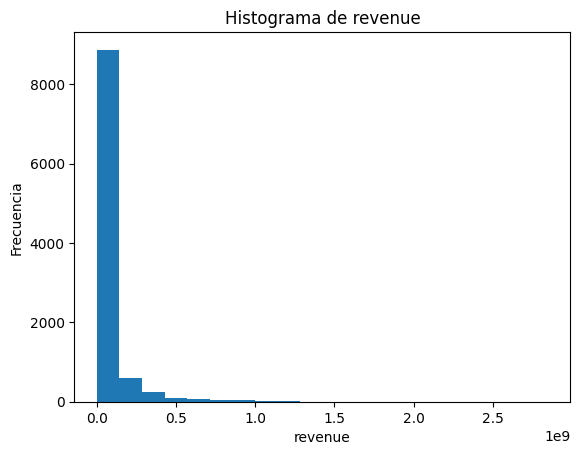

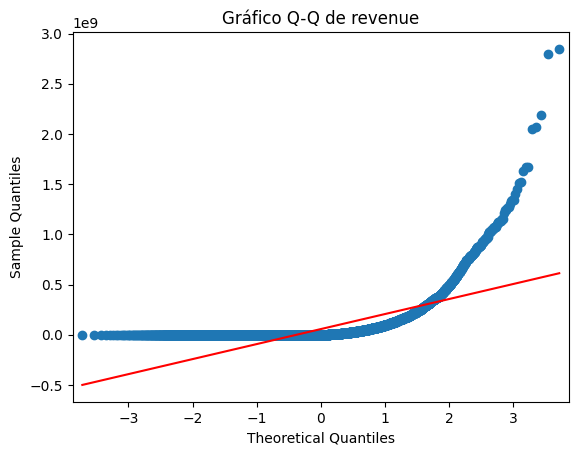

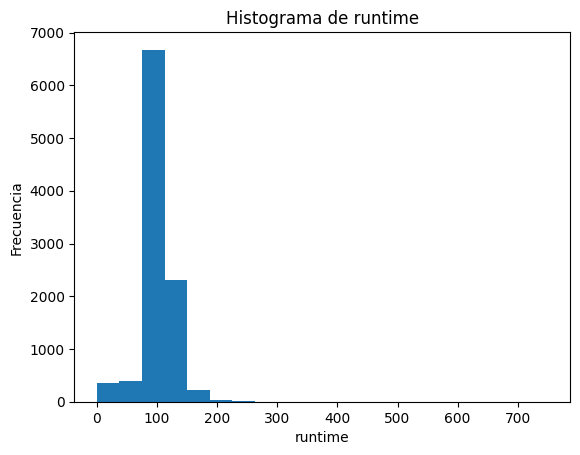

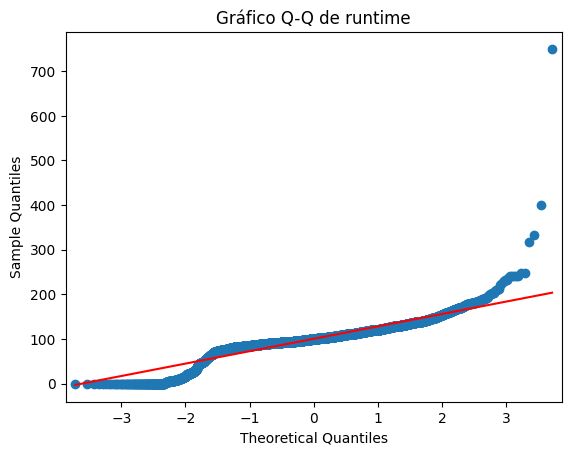

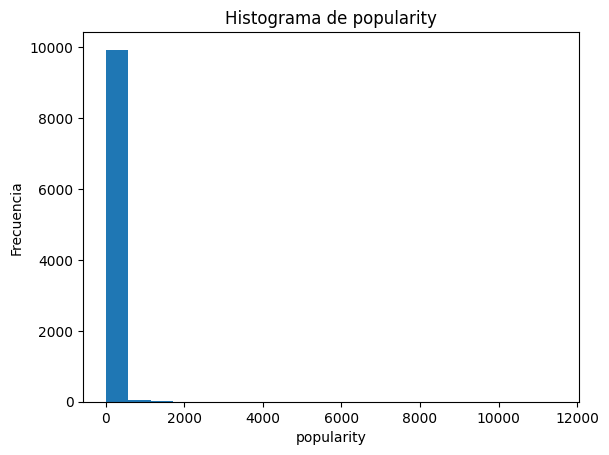

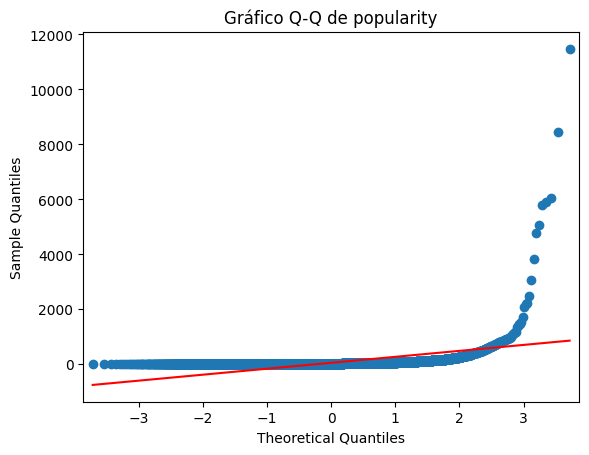

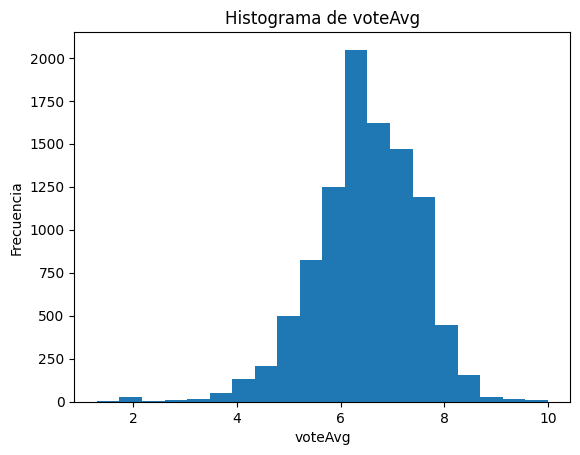

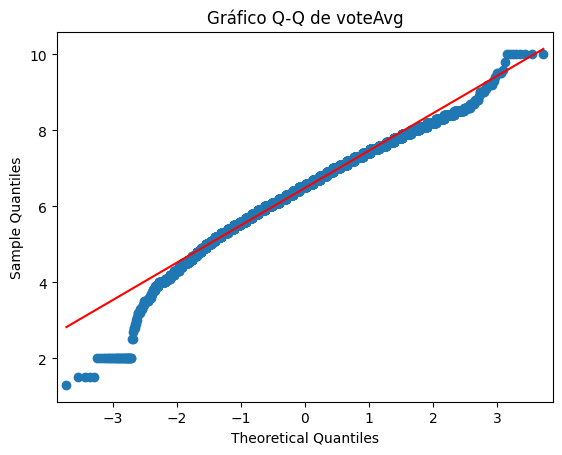

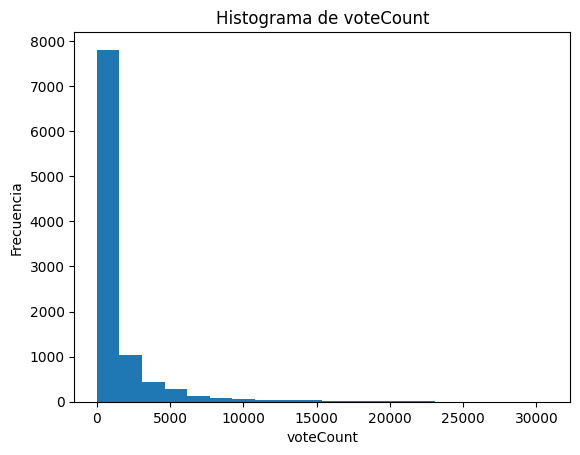

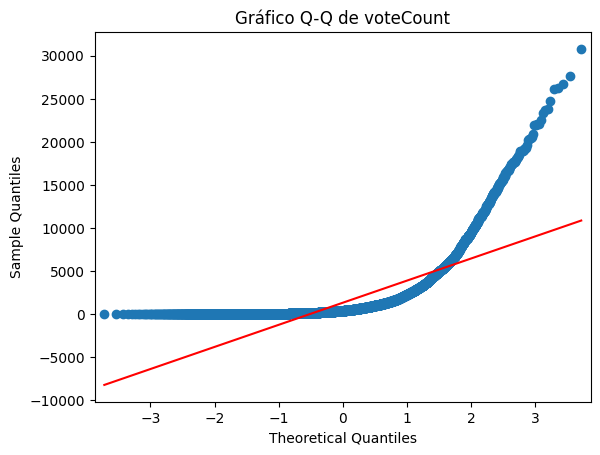

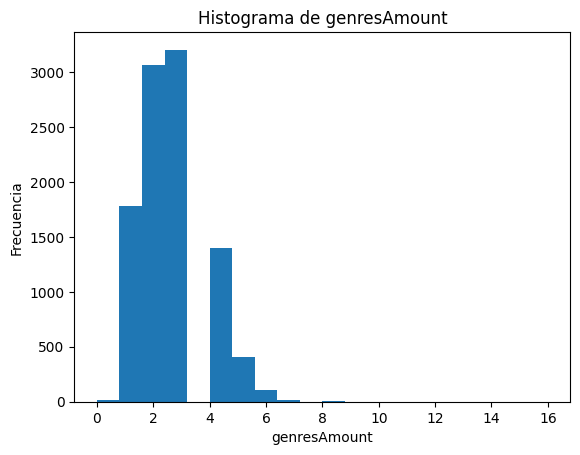

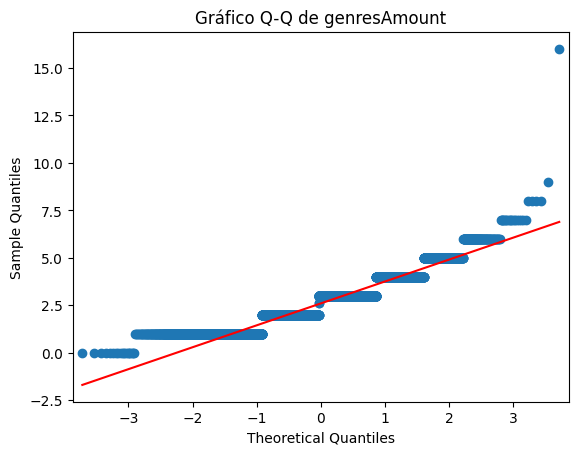

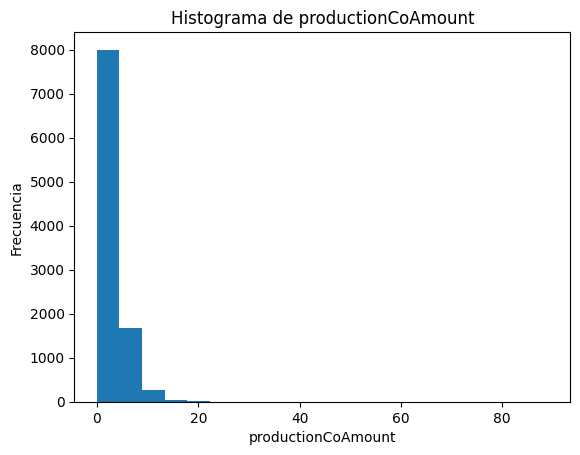

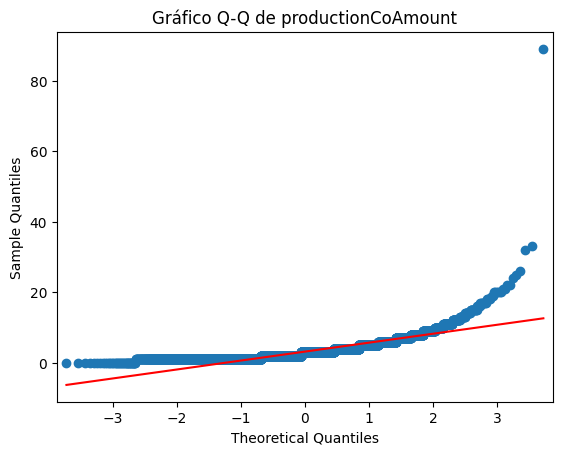

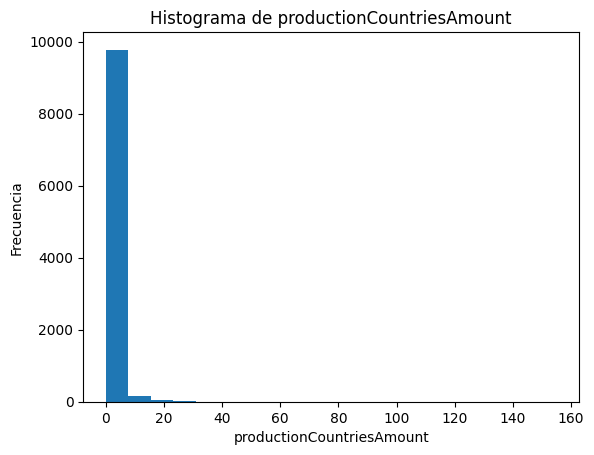

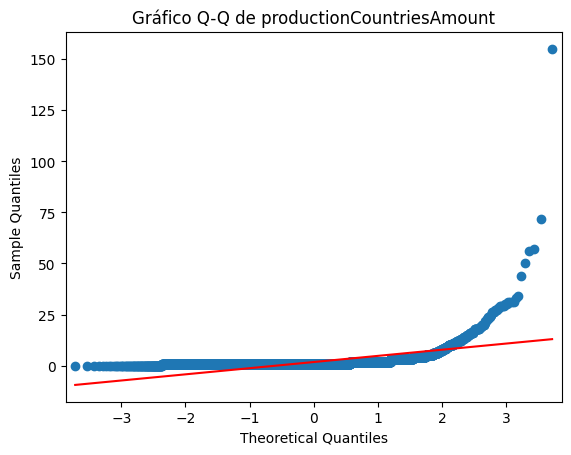

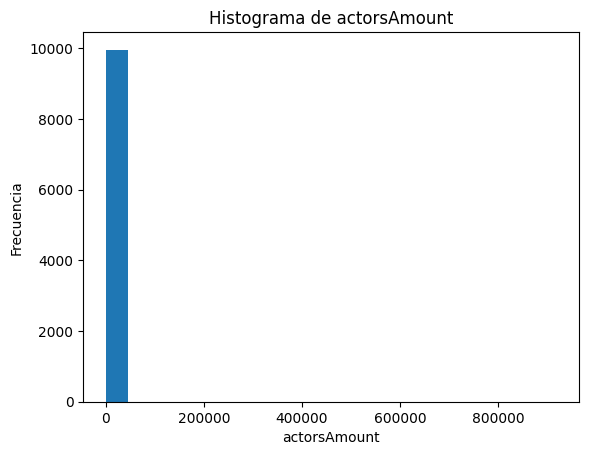

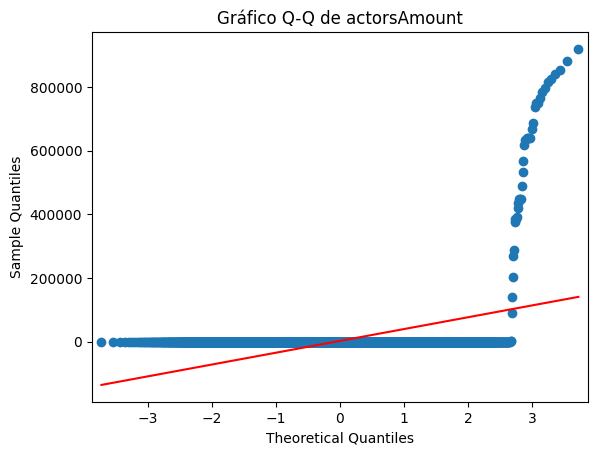

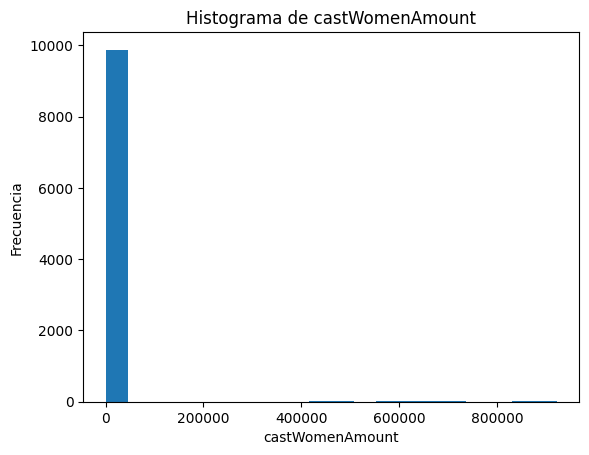

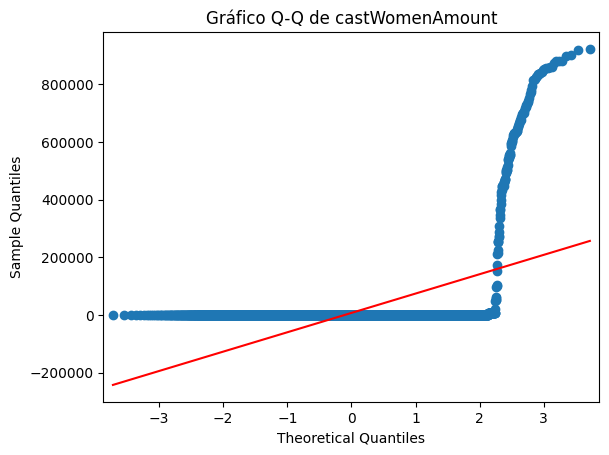

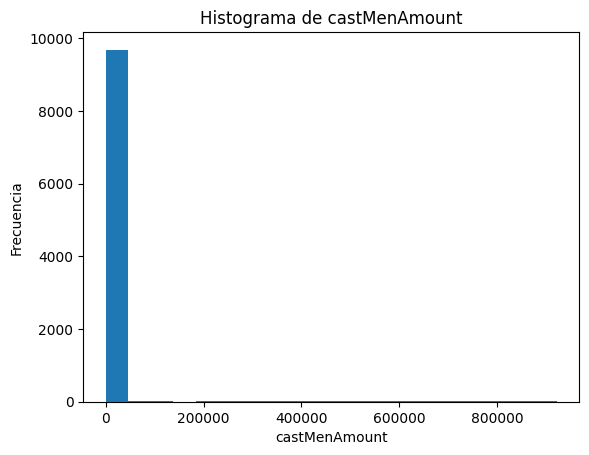

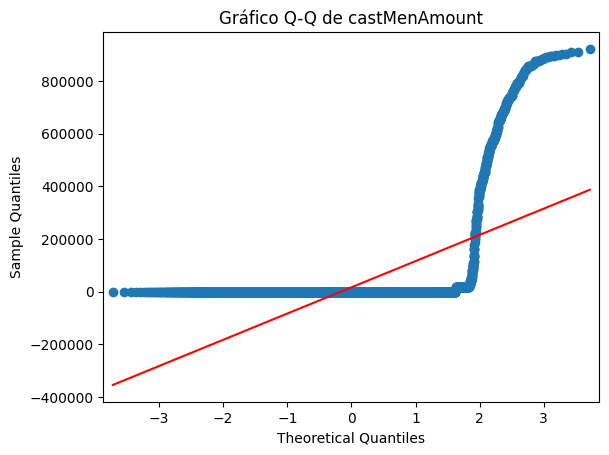

In [ ]:
for var in cuantitativas:
    # Crear un histograma
    plt.hist(df[var], bins=20)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

    # Crear un gráfico Q-Q
    sm.qqplot(df[var], line="s")
    plt.title(f"Gráfico Q-Q de {var}")
    plt.show()

In [ ]:
for var in cuantitativas:
    # Realizar una prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(df[var])
    print(f"Prueba de Shapiro-Wilk para {var}:")
    print(f"Estadístico: {shapiro_test[0]}")
    print(f"Valor p: {shapiro_test[1]}")
    print()

    # Realizar una prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(df[var], "norm")
    print(f"Prueba de Kolmogorov-Smirnov para {var}:")
    print(f"Estadístico: {ks_test[0]}")
    print(f"Valor p: {ks_test[1]}")
    print()

Prueba de Shapiro-Wilk para revenue:
Estadístico: 0.414276123046875
Valor p: 0.0

Prueba de Kolmogorov-Smirnov para revenue:
Estadístico: 0.5222161039806446
Valor p: 0.0

Prueba de Shapiro-Wilk para runtime:
Estadístico: 0.8530582785606384
Valor p: 0.0

Prueba de Kolmogorov-Smirnov para runtime:
Estadístico: 0.9889694286481778
Valor p: 0.0

Prueba de Shapiro-Wilk para popularity:
Estadístico: 0.11125153303146362
Valor p: 0.0

Prueba de Kolmogorov-Smirnov para popularity:
Estadístico: 0.9999896868025426
Valor p: 0.0

Prueba de Shapiro-Wilk para voteAvg:
Estadístico: 0.9796258211135864
Valor p: 1.9717537332742248e-35

Prueba de Kolmogorov-Smirnov para voteAvg:
Estadístico: 0.9948133120170887
Valor p: 0.0

Prueba de Shapiro-Wilk para voteCount:
Estadístico: 0.5261006355285645
Valor p: 0.0

Prueba de Kolmogorov-Smirnov para voteCount:
Estadístico: 0.9879511718613806
Valor p: 0.0

Prueba de Shapiro-Wilk para genresAmount:
Estadístico: 0.905331015586853
Valor p: 0.0

Prueba de Kolmogorov-Smi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Aquellas columnas con un valor p menor a 0.05, indican que los datos **NO** son normales.

In [ ]:
# Hacer una tabla de frecuencias de las variables cualitativas
for var in cualitativas:
    # Contar el número de veces que cada categoría aparece en la variable
    frecuencias = df[var].value_counts()
    print(f"Tabla de frecuencias de {var}:")
    print(frecuencias)
    print()

    # Mostrar las frecuencias como proporciones del total
    proporciones = df[var].value_counts() / df[var].count()
    print(f"Tabla de proporciones de {var}:")
    print(proporciones)
    print()

Tabla de frecuencias de budget:
0.0           4811
10000000.0     205
20000000.0     199
25000000.0     179
30000000.0     172
              ... 
90.0             1
7202188.0        1
475000.0         1
11715578.0       1
254056.0         1
Name: budget, Length: 669, dtype: int64

Tabla de proporciones de budget:
0.0           0.481052
10000000.0    0.020498
20000000.0    0.019898
25000000.0    0.017898
30000000.0    0.017198
                ...   
90.0          0.000100
7202188.0     0.000100
475000.0      0.000100
11715578.0    0.000100
254056.0      0.000100
Name: budget, Length: 669, dtype: float64

Tabla de frecuencias de genres:
Drama                                  521
Comedy                                 440
Horror                                 230
Drama|Romance                          211
Horror|Thriller                        205
                                      ... 
Science Fiction|Comedy|Adventure         1
War|Action|Adventure|Drama|Thriller      1
Horror|Comedy

### Ejercicio 4

#### Ejercicio 4.1, 4.2, 4.3 & 4.4

In [ ]:
# Importamos el paquete tabulate
import tabulate

# Definimos una función que ordena el conjunto de datos por una columna y devuelve las 10 primeras filas
def top_10(df, column, ascending):
  # Ordenamos el conjunto de datos por la columna en orden descendente
  df_sorted = df.sort_values(by=column, ascending=ascending)
  # Seleccionamos las 10 primeras filas
  df_top_10 = df_sorted.head(10)
  df_title_element = df_top_10.loc[:, ["title", column]]
  # Devolvemos el resultado
  return df_title_element

##### 4.1
¿Cuáles son las 10 películas que contaron con más presupuesto?

In [ ]:
# Imprimimos el resultado de la función top_10 para la columna de presupuesto con formato de psql
print(tabulate.tabulate(top_10(df, 'budget', False), tablefmt='psql', headers='keys', showindex=False))

+---------------------------------------------+----------+
| title                                       |   budget |
|---------------------------------------------+----------|
| Pirates of the Caribbean: On Stranger Tides | 3.8e+08  |
| Avengers: Age of Ultron                     | 3.65e+08 |
| Avengers: Endgame                           | 3.56e+08 |
| Pirates of the Caribbean: At World's End    | 3e+08    |
| Avengers: Infinity War                      | 3e+08    |
| Justice League                              | 3e+08    |
| Superman Returns                            | 2.7e+08  |
| The Lion King                               | 2.6e+08  |
| Tangled                                     | 2.6e+08  |
| Spider-Man 3                                | 2.58e+08 |
+---------------------------------------------+----------+


Como se puede observar en los resultados obtenidos, la película con el mayor presupuesto es Piratas del Caribe con un presupuesto de $8mil millones, le siguen Avengers y otra de Piratas del Caribe. A partir de estos resultados, se puede observar que las películas con mayor presupuesto son aquellas que suenan bastante en distintas comunidades. Además, son películas de acción en su mayoría.

##### 4.2
¿Cuáles son las 10 películas que más ingresos tuvieron?

In [ ]:
# Imprimimos el resultado de la función top_10 para la columna de ingresos con formato de psql
print(tabulate.tabulate(top_10(df, 'revenue', False), tablefmt='psql', headers='keys', showindex=False))

+------------------------------+------------+
| title                        |    revenue |
|------------------------------+------------|
| Avatar                       | 2847246203 |
| Avengers: Endgame            | 2797800564 |
| Titanic                      | 2187463944 |
| Star Wars: The Force Awakens | 2068223624 |
| Avengers: Infinity War       | 2046239637 |
| Jurassic World               | 1671713208 |
| The Lion King                | 1667635327 |
| Spider-Man: No Way Home      | 1631853496 |
| The Avengers                 | 1518815515 |
| Furious 7                    | 1515047671 |
+------------------------------+------------+


Al igual que en los resultados anteriores, aquellas peliculas con el mayor ingreso son las que tienen comunidades grandes que hablan de la película por un tiempo prolongado. Películas que levantan mucho *hype* o emoción.

##### 4.3
¿Cuál es la película que más votos tuvo?

In [ ]:
# Imprimimos el resultado de la función top_10 para la columna de ingresos con formato de psql
print(tabulate.tabulate(top_10(df, 'voteCount', False), tablefmt='psql', headers='keys', showindex=False))

+-------------------------+-------------+
| title                   |   voteCount |
|-------------------------+-------------|
| Inception               |       30788 |
| Interstellar            |       27644 |
| The Dark Knight         |       26690 |
| The Avengers            |       26215 |
| Deadpool                |       26178 |
| Avatar                  |       24766 |
| Guardians of the Galaxy |       23806 |
| Avengers: Infinity War  |       23715 |
| Fight Club              |       23338 |
| Pulp Fiction            |       22501 |
+-------------------------+-------------+


Inception. Esto quiere decir que a las personas les gustan las películas que tengan mucha profundidad en su trama.

##### 4.4
¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [ ]:
# Imprimimos el resultado de la función top_10 para la columna de ingresos con formato de psql
print(tabulate.tabulate(top_10(df, 'voteAvg', True), tablefmt='psql', headers='keys', showindex=False))

+----------------------------------------------------------------------------------+-----------+
| title                                                                            |   voteAvg |
|----------------------------------------------------------------------------------+-----------|
| DAKAICHI -I'm Being Harassed by the Sexiest Man of the Year- The Movie: In Spain |       1.3 |
| El Paseo 6                                                                       |       1.5 |
| Harry Potter: Different Perspective                                              |       1.5 |
| My Father's Other Family                                                         |       1.5 |
| DRagON BALL P2 2wice dropda bbeet                                                |       1.5 |
| PorNO                                                                            |       2   |
| Scream for Summer                                                                |       2   |
| Gokuraku sentô: Kyonyû yumom

"DAKAICHI - Estoy siendo acosada por el hombre más sexy del año" Creo que el nombre de la película lo dice todo. Empezando por el nombre, es fácil saber que sería una mala película.

#### Ejercicio 4.5
¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más
películas? Haga un gráfico de barras

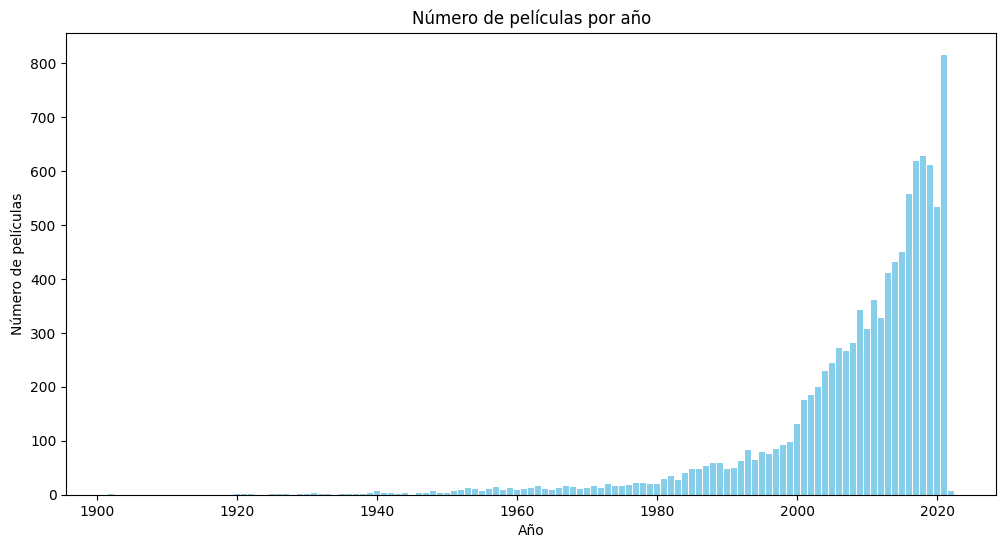

In [ ]:
# Convertir la columna releaseDate en datetime
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors='coerce')

# Extraer el año de la columna releaseDate
df["year"] = df["releaseDate"].dt.year

# Contar el número de películas por año
df_count = df['year'].value_counts().sort_index()

# Hacer un gráfico de barras que muestre el número de películas por año
plt.figure(figsize=(12,6))
plt.bar(df_count.index, df_count.values, color='skyblue')
plt.xlabel("Año")
plt.ylabel("Número de películas")
plt.title("Número de películas por año")
plt.show()

Como se puede observar en la figura, las películas empezaron a desarrolarse en masa después de los años 60. Por 1900 ya se habían desarrollado unas cuantas, pero no hubieron muchas hasta post-1920. Fue en 2021 que se desarrollaron 800 películas, siendo el año con más películas.

#### Ejercicio 4.6
¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género
principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

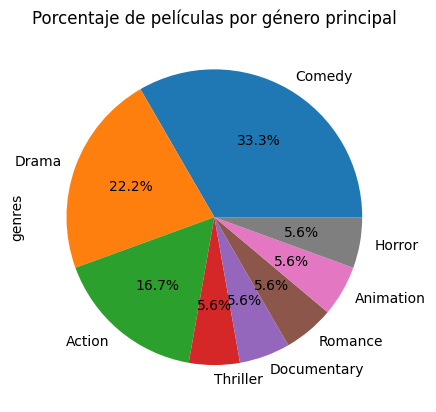

In [ ]:
# Ordenar el DataFrame según la fecha de estreno de más reciente a más antigua
df_sorted = df.sort_values(by="releaseDate", ascending=False)

# Seleccionar las primeras 20 filas del DataFrame ordenado
df_top20 = df_sorted.head(20)

# Contar el número de películas por género principal
df_genre = df_top20["genres"].str.split("|").str.get(0).value_counts()

# Hacer un gráfico circular que muestre el porcentaje de películas por género principal
df_genre.plot.pie(autopct="%1.1f%%")
plt.title("Porcentaje de películas por género principal")
plt.show()

Se pueden apreciar varios género, desde la acción hasta el horror. Dicho esto, el género que más predomina es el cómico, con un 33.3% de las 20 películas más recientes siendo de comedia.

#### Ejercicio 4.7
¿Las películas de qué genero principal obtuvieron mayores ganancias?

<ipython-input-64-5a3d040cf2f9>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = df_grouped.sum()


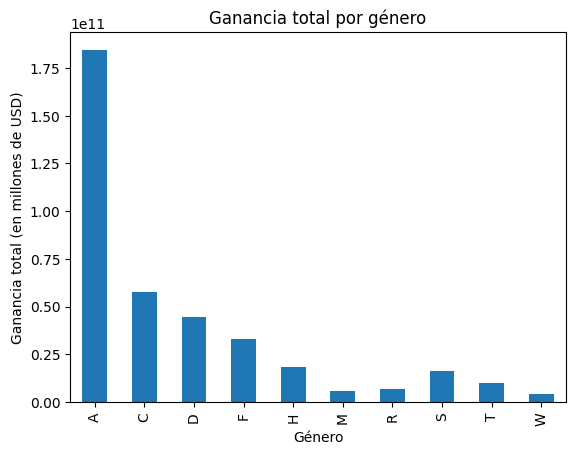

In [ ]:
# Crear una nueva columna con la ganancia de cada película
df = df.assign(profit = df["revenue"] - df["budget"])

# Agrupar el DataFrame según el género principal
df_grouped = df.groupby(df["genres"].str[0])

# Sumar las ganancias de las películas por cada género
df_sum = df_grouped.sum()

# Hacer un gráfico de barras que muestre la ganancia total por género
df_sum["profit"].plot.bar()
plt.xlabel("Género")
plt.ylabel("Ganancia total (en millones de USD)")
plt.title("Ganancia total por género")
plt.show()

Las películas de acción fueron las que más ganancias tuvieron. Claro, visto en los resultados de las primeras preguntas, se pudo inferir que las películas de acción son las más apreciadas por el público.

#### Ejercicio 4.8
¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho
películas con más actores en los últimos años?


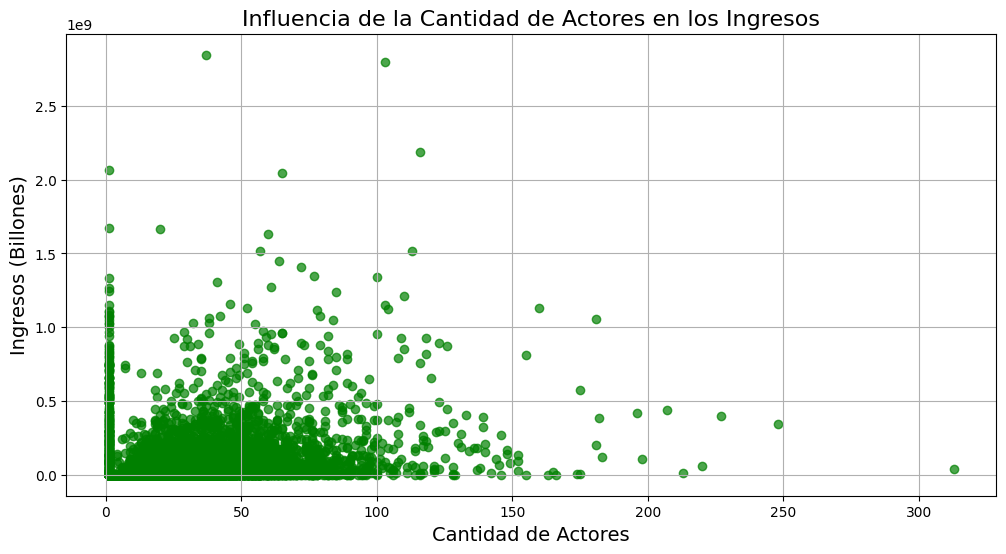

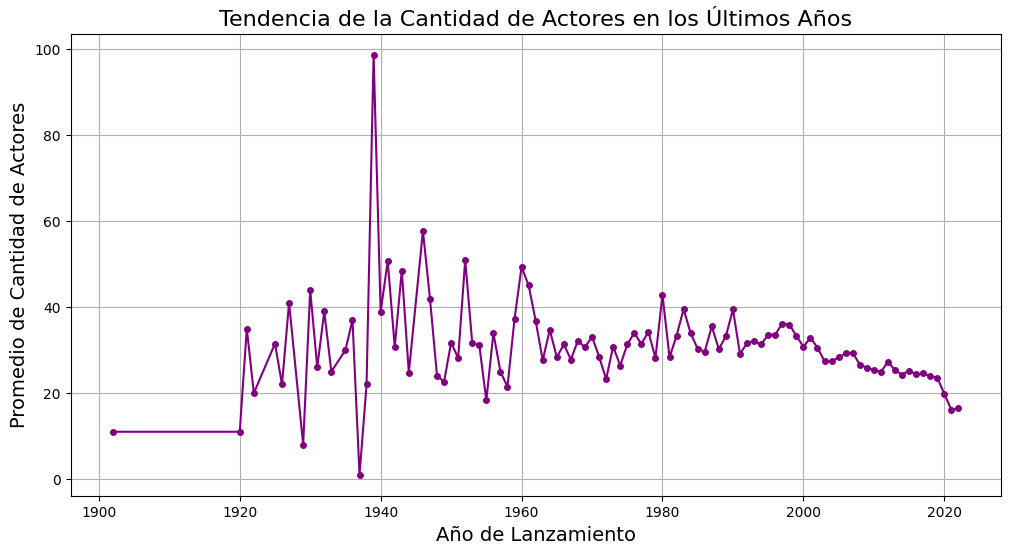

In [ ]:
# Convertir 'releaseDate' a formato de fecha y extraer el año
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['año_lanzamiento'] = df['releaseDate'].dt.year

# Convertir 'revenue' a numérico
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Limpieza de datos: reemplaza los valores NaN en 'actors' con una cadena vacía y calcula la cantidad de actores
df['actors'] = df['actors'].fillna('')
df['cantidad_actores'] = df['actors'].str.split('|').apply(len)

# Análisis de la influencia de la cantidad de actores en los ingresos (Gráfico de dispersión)
plt.figure(figsize=(12, 6))
plt.scatter(df['cantidad_actores'], df['revenue'], alpha=0.7, color='green')
plt.title('Influencia de la Cantidad de Actores en los Ingresos', fontsize=16)
plt.xlabel('Cantidad de Actores', fontsize=14)
plt.ylabel('Ingresos (Billones)', fontsize=14)
plt.grid(True)
plt.show()

# Análisis de la tendencia de la cantidad de actores en los últimos años (Gráfico de línea)
conteo_actores_por_año = df.groupby('año_lanzamiento')['cantidad_actores'].mean()
conteo_actores_por_año = conteo_actores_por_año.dropna()

plt.figure(figsize=(12, 6))
conteo_actores_por_año.plot(kind='line', marker='.', color='purple', markersize=8)
plt.title('Tendencia de la Cantidad de Actores en los Últimos Años', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Promedio de Cantidad de Actores', fontsize=14)
plt.grid(True)
plt.show()

El análisis visual indica que no existe una correlación aparente entre la cantidad de actores de una película y sus ingresos, y muestra una tendencia decreciente en el número promedio de actores en películas a lo largo del tiempo, estabilizándose en las últimas décadas.

#### Ejercicio 4.9
¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la
popularidad y los ingresos de las películas?

In [ ]:

# Calcular la correlación
correlation_women_popularity = df['castWomenAmount'].corr(df['popularity'])
correlation_men_popularity = df['castMenAmount'].corr(df['popularity'])
correlation_women_revenue = df['castWomenAmount'].corr(df['revenue'])
correlation_men_revenue = df['castMenAmount'].corr(df['revenue'])

print("Correlación entre cantidad de mujeres en el reparto y popularidad:", correlation_women_popularity)
print("Correlación entre cantidad de hombres en el reparto y popularidad:", correlation_men_popularity)
print("Correlación entre cantidad de mujeres en el reparto y ingresos:", correlation_women_revenue)
print("Correlación entre cantidad de hombres en el reparto y ingresos:", correlation_men_revenue)

Correlación entre cantidad de mujeres en el reparto y popularidad: -0.001780061782817108
Correlación entre cantidad de hombres en el reparto y popularidad: 0.002774689277037501
Correlación entre cantidad de mujeres en el reparto y ingresos: -0.037386427522052734
Correlación entre cantidad de hombres en el reparto y ingresos: -0.060064499589388726


Los coeficientes de correlación indican que tanto la presencia de mujeres como de hombres en el reparto tiene una influencia mínima en la popularidad y los ingresos de las películas, con una relación ligeramente más negativa para los hombres en términos de ingresos. No se observa una relación significativa que sugiera que el género del elenco afecte de manera notable el éxito comercial o la popularidad de las películas.

#### Ejercicio 4.10
¿Quiénes son los directores que hicieron las 20 películas mejor
calificadas?

In [ ]:
# Ordenar por calificación y seleccionar los directores de las 20 mejores películas
top_20_directores = df.sort_values('voteAvg', ascending=False).head(20)[['title', 'director']]
print(tabulate.tabulate(top_20_directores, headers='keys', tablefmt='psql'))

+------+--------------------------------------------------------+----------------------------------------+
|      | title                                                  | director                               |
|------+--------------------------------------------------------+----------------------------------------|
| 9348 | How Ponyo was Born ~Hayao Miyazaki's Thought Process~  | Kaku Arakawa                           |
| 9991 | Los Vengadores Chiflados                               | Miguel Angel Zavala                    |
| 9734 | Christmas at the Ranch                                 | Christin Baker                         |
| 9247 | Steven Universe: The Movie: Behind the Curtain         | Rebecca Sugar                          |
| 9876 | El Chavo Del Ocho: Lo Mejor De Don Ramon               | Desconocido                            |
| 9085 | Holidays                                               | Víctor Barba|Juan Olivares             |
| 8633 | Hot Naked Sex & the City    

La tabla con las 20 películas mejor calificadas y sus respectivos directores, ordenados de mayor a menor según su calificación promedio. La tabla revela que algunos directores, como Kaku Arakawa y Rebecca Sugar, están asociados con películas altamente calificadas, aunque también hay varias películas cuyos directores no están identificados.

#### Ejercicio 4.11

¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos
presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma,diagrama de dispersión

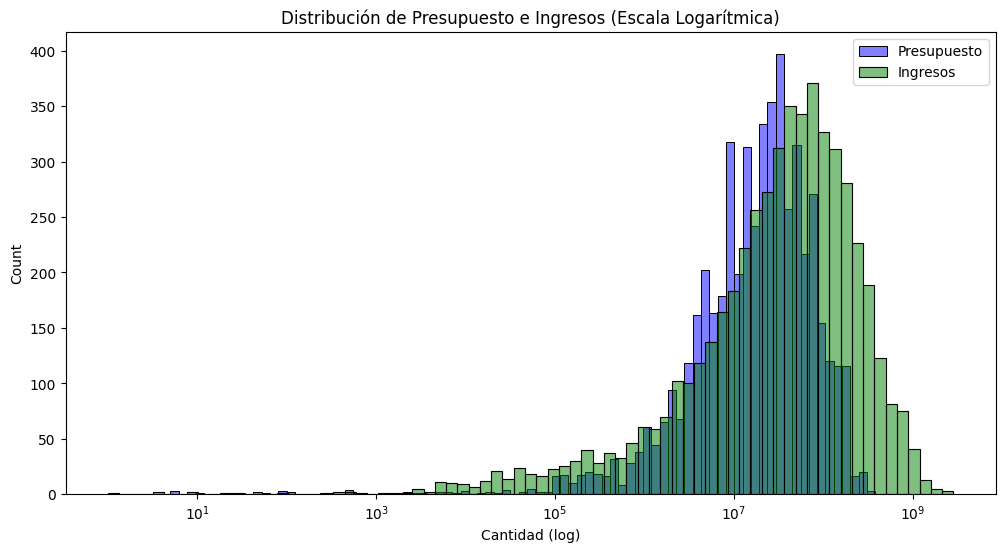

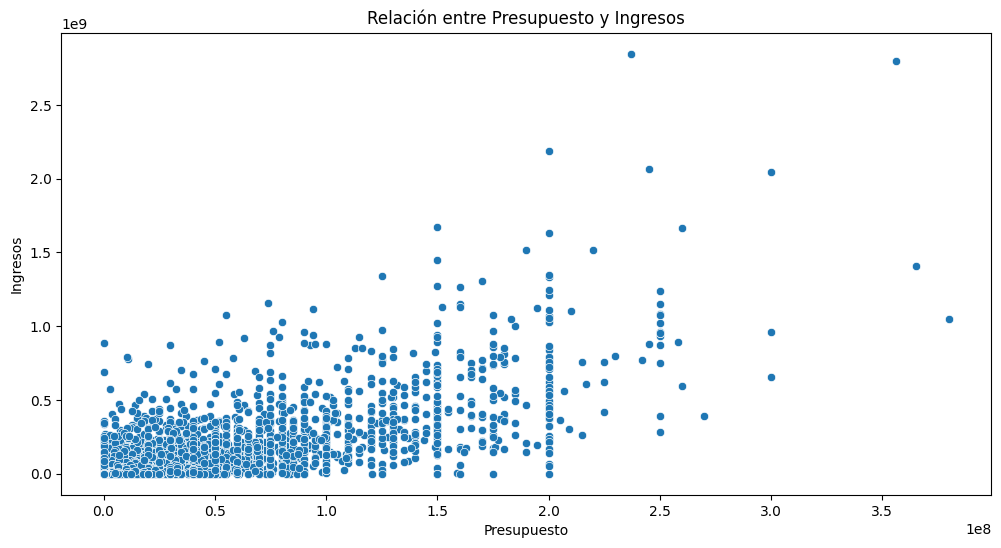

In [ ]:

# Histograma con escala logarítmica
plt.figure(figsize=(12, 6))
sns.histplot(df, x='budget', color='blue', kde=True, label='Presupuesto', alpha=0.5, log_scale=True)
sns.histplot(df, x='revenue', color='green', kde=True, label='Ingresos', alpha=0.5, log_scale=True)
plt.title('Distribución de Presupuesto e Ingresos (Escala Logarítmica)')
plt.xlabel('Cantidad (log)')
plt.legend()
plt.show()

# Diagrama de dispersión (scatter plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre Presupuesto y Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()


Los gráficos muestran que, aunque hay una superposición en las distribuciones de presupuesto e ingresos de las películas, el diagrama de dispersión no indica una relación lineal fuerte, sugiriendo que un presupuesto más alto no garantiza automáticamente ingresos más elevados. La variabilidad en los ingresos a pesar de aumentos en el presupuesto sugiere que otros factores además del presupuesto influyen significativamente en el éxito financiero de una película.

#### Ejercicio 4.12
Se asocian ciertos meses de lanzamiento con mejores ingresos?

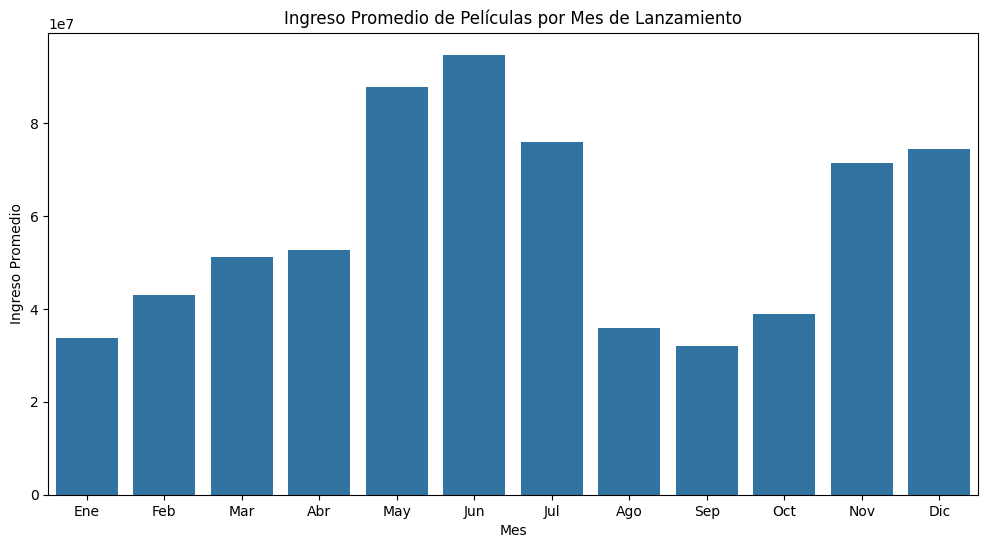

In [ ]:
# Extraer el mes de la fecha de lanzamiento
df['releaseMonth'] = df['releaseDate'].dt.month

# Calcular el ingreso promedio por mes
average_revenue_by_month = df.groupby('releaseMonth')['revenue'].mean()

# Crear un gráfico de barras para visualizar el ingreso promedio por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_revenue_by_month.index, y=average_revenue_by_month.values)
plt.title('Ingreso Promedio de Películas por Mes de Lanzamiento')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

#### Ejercicio 4.13
¿En qué meses se han visto los lanzamientos con mejores ingresos?¿cuantas películas, en promedio, se han lanzado por mes?

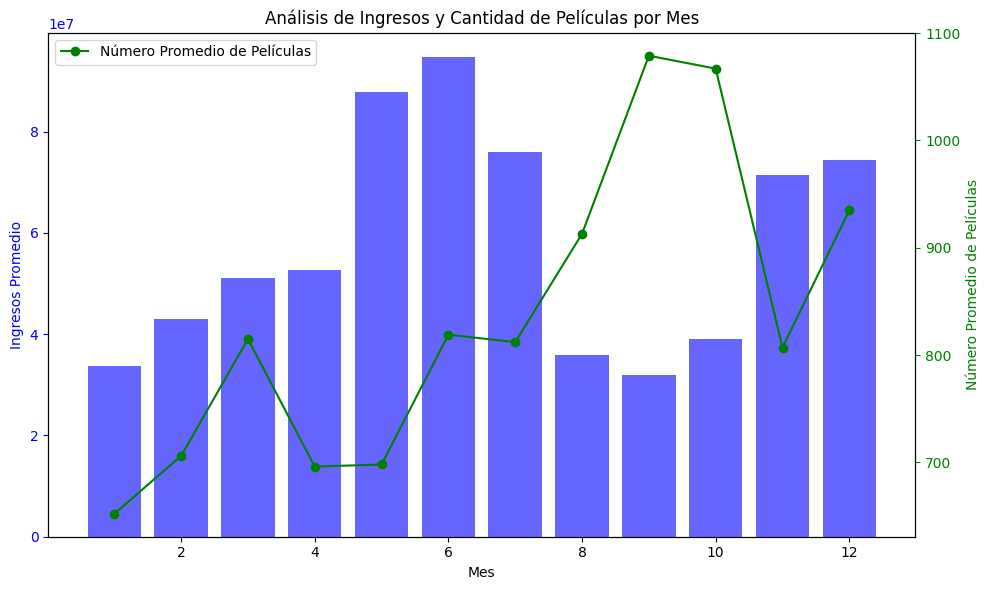

  releaseMonth    AverageRevenue    AverageMovieCount
--------------  ----------------  -------------------
             1       3.37737e+07                  652
             2       4.29084e+07                  706
             3       5.11159e+07                  815
             4       5.25957e+07                  696
             5       8.78454e+07                  698
             6       9.47471e+07                  819
             7       7.60287e+07                  812
             8       3.59701e+07                  913
             9       3.19289e+07                 1079
            10       3.89845e+07                 1067
            11       7.14921e+07                  807
            12       7.43589e+07                  935


In [26]:
# Convertir la columna 'releaseDate' a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extraer el mes de la fecha de lanzamiento
df['releaseMonth'] = df['releaseDate'].dt.month

# Agrupar por mes y calcular el ingreso medio y la cantidad promedio de películas lanzadas
monthly_analysis = df.groupby('releaseMonth').agg({'revenue': 'mean', 'id': 'count'})
monthly_analysis.rename(columns={'revenue': 'AverageRevenue', 'id': 'AverageMovieCount'}, inplace=True)

# Crear un gráfico de barras doble
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para ingresos promedio
ax1.bar(monthly_analysis.index, monthly_analysis['AverageRevenue'], color='b', alpha=0.6, label='Ingresos Promedio')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ingresos Promedio', color='b')
ax1.tick_params('y', colors='b')

# Crear un segundo eje y para el número promedio de películas
ax2 = ax1.twinx()
ax2.plot(monthly_analysis.index, monthly_analysis['AverageMovieCount'], color='g', marker='o', label='Número Promedio de Películas')
ax2.set_ylabel('Número Promedio de Películas', color='g')
ax2.tick_params('y', colors='g')

# Títulos y leyendas
plt.title('Análisis de Ingresos y Cantidad de Películas por Mes')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


# Usar tabulate para mostrar la tabla en formato SQL
print(tabulate.tabulate(monthly_analysis, headers='keys', tablefmt='sql'))

La imagen muestra un gráfico combinado de barras y líneas que ilustra los ingresos promedio y el número promedio de películas lanzadas por mes. Los meses de junio y diciembre destacan con los ingresos promedio más altos, mientras que octubre tiene el mayor número promedio de lanzamientos de películas, lo que podría indicar tendencias estacionales en la industria cinematográfica.

#### Ejercicio 4.14
¿Cómo se correlacionan las calificaciones con el éxito comercial?

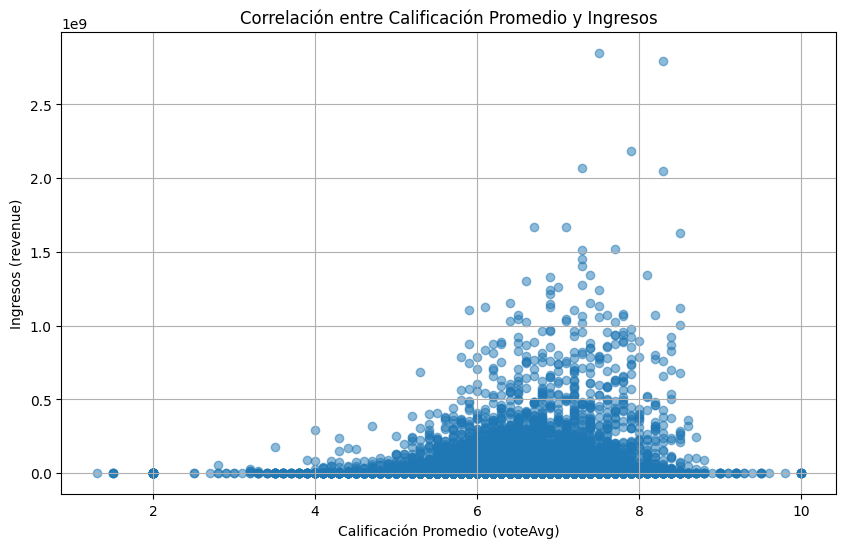

          voteAvg   revenue
voteAvg  1.000000  0.141263
revenue  0.141263  1.000000


In [28]:
# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['voteAvg'], df['revenue'], alpha=0.5)
plt.title('Correlación entre Calificación Promedio y Ingresos')
plt.xlabel('Calificación Promedio (voteAvg)')
plt.ylabel('Ingresos (revenue)')
plt.grid(True)
plt.show()

# Calcular la correlación entre 'voteAvg' y 'revenue'
correlation = df[['voteAvg', 'revenue']].corr()
print(correlation)

La imagen muestra un análisis de correlación entre la calificación promedio de las películas y sus ingresos, representado por un gráfico de dispersión y un coeficiente de correlación. El gráfico revela una distribución amplia con una correlación positiva leve (0.141263), lo que sugiere que, aunque hay una tendencia a que películas con calificaciones más altas tengan ingresos mayores, la relación no es fuerte y hay muchas excepciones.

#### Ejercicio 4.15
¿A qué género principal pertenecen las películas más largas?

In [23]:

# Ordenar las películas por 'runtime' de mayor a menor
sorted_movies = df.sort_values(by='runtime', ascending=False)

# Extraer el género principal (asumiendo que es el primero en la lista de géneros)
sorted_movies['mainGenre'] = sorted_movies['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Desconocido')

# Seleccionar las top N películas más largas para el análisis
top_longest_movies = sorted_movies.head(10)

# Crear una tabla para mostrar los datos
table = top_longest_movies[['originalTitle', 'runtime', 'mainGenre']]

# Usar tabulate para mostrar la tabla en formato SQL
print(tabulate.tabulate(table, headers='keys', tablefmt='sql'))

      originalTitle                                                                                                                                                                          runtime  mainGenre
----  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ---------  ----------------------------------------
9348  <U+30DD><U+30CB><U+30E7><U+306F><U+3053><U+3046><U+3057><U+3066><U+751F><U+307E><U+308C><U+305F> <U+301C> <U+5BAE><U+FA11><U+99FF><U+306E><U+601D><U+8003><U+904E><U+7A0B> <U+301C>        750  Documentary
5359  Crystal Lake Memories: The Complete History of Friday the 13th                                                                                                                             400  Documentary
3886  Napoléon                                                                                                                       

La tabla resultante de un análisis de datos que identifica los géneros principales de las películas más largas. Sin embargo, los títulos de las películas en la tabla se muestran con caracteres Unicode codificados en lugar de texto legible. A pesar de esto, se puede observar que los géneros principales de las películas más largas varían, incluyendo Documental, Drama, Acción, y Romance, entre otros.